In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_reviews.csv')

In [3]:
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,Stephanie Portillo,fornikite with no colombus wind daphnee,5,0,NaN,2025-01-03 15:21:55,NaN
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,Limboy Calicdan,"Yes I, m",5,0,7.120.6 build 63 35594,2025-01-03 15:16:05,7.120.6 build 63 35594
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Bucky Butcher,Adds popping up during movies,1,0,NaN,2025-01-03 15:16:01,NaN
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,Kimberly,App will not open on Amazon Fire Tablet. I can...,1,0,NaN,2025-01-03 15:10:25,NaN
4,e2cc058d-3a3f-44e9-a4fe-4368d6985382,Shøvø,♥️♥️♥️♥️♥️♥️,5,0,NaN,2025-01-03 14:55:14,NaN


In [4]:
df.describe()

,score,thumbsUpCount
count,123860.000000,123860.000000
mean,2.831382,9.675819
std,1.712900,97.306045
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [5]:
df.shape

(123860, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123860 entries, 0 to 123859
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              123860 non-null  object
 1   userName              123858 non-null  object
 2   content               123855 non-null  object
 3   score                 123860 non-null  int64 
 4   thumbsUpCount         123860 non-null  int64 
 5   reviewCreatedVersion  104403 non-null  object
 6   at                    123860 non-null  object
 7   appVersion            104403 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.6+ MB


In [7]:
df.nunique()

reviewId                123074
userName                 89848
content                 120657
score                        5
thumbsUpCount              906
reviewCreatedVersion       595
at                      123515
appVersion                 595
dtype: int64

In [8]:
df.isnull().sum()

reviewId                    0
userName                    2
content                     5
score                       0
thumbsUpCount               0
reviewCreatedVersion    19457
at                          0
appVersion              19457
dtype: int64

In [9]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [10]:
df.dtypes

reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object

In [11]:
# rename at column to date
df.rename(columns={'at':'date','content':'comment'}, inplace=True)
df.head(5)

,reviewId,userName,comment,score,thumbsUpCount,reviewCreatedVersion,date,appVersion
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,Stephanie Portillo,fornikite with no colombus wind daphnee,5,0,NaN,2025-01-03 15:21:55,NaN
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,Limboy Calicdan,"Yes I, m",5,0,7.120.6 build 63 35594,2025-01-03 15:16:05,7.120.6 build 63 35594
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Bucky Butcher,Adds popping up during movies,1,0,NaN,2025-01-03 15:16:01,NaN
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,Kimberly,App will not open on Amazon Fire Tablet. I can...,1,0,NaN,2025-01-03 15:10:25,NaN
4,e2cc058d-3a3f-44e9-a4fe-4368d6985382,Shøvø,♥️♥️♥️♥️♥️♥️,5,0,NaN,2025-01-03 14:55:14,NaN


In [12]:
# convert the date column to datetime object
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

reviewId                        object
userName                        object
comment                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
date                    datetime64[ns]
appVersion                      object
dtype: object


In [13]:
# delete unwated columns
columns_to_delete = ['userName','thumbsUpCount','reviewCreatedVersion','appVersion']
df.drop(columns=columns_to_delete, inplace=True)
df.head(5)

,reviewId,comment,score,date
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,"Yes I, m",5,2025-01-03 15:16:05
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25
4,e2cc058d-3a3f-44e9-a4fe-4368d6985382,♥️♥️♥️♥️♥️♥️,5,2025-01-03 14:55:14


In [14]:
# find duplicat reviewId
df[df.duplicated(subset=['reviewId'])]

,reviewId,comment,score,date
1190,8e914941-0699-4081-989c-3ce54e55f375,"Got a new phone, removed the old phone and all...",1,2024-12-25 04:19:37
1375,3b04336a-7983-4444-b784-d09c09089c91,Now what. Bloody Netflix keeps telling me my T...,2,2024-12-23 08:27:45
1518,e1afcf12-1db1-4435-80de-089882cba6cd,I've always loved Netflix and haven't had many...,5,2024-12-22 04:41:59
1565,cedf251b-7799-40f7-8906-132b9ef5240a,Why am I not getting notifications on netflix?...,1,2024-12-21 14:38:49
1905,cd2a186e-b5c1-44b2-912f-951a4fe36725,Not following screen brightness of device,4,2024-12-18 12:15:24
...,...,...,...,...
120720,87fa926e-6319-484f-b4f7-3b760d9e9016,Nice app if I knew how to make a Netflix serie...,3,2023-08-28 08:50:59
121247,b9b326f6-2265-47e9-9075-d211dad8139e,"Low quality on Galaxy Tab s8+ (even when ""HD"" ...",5,2023-09-20 19:46:27
121800,783f611f-6f2a-4bd3-8a0e-567cf1152721,Very well satisfied.. Best app and good qualit...,5,2019-10-02 13:39:32
123130,c9c1d866-1c12-4005-9aa3-2b798e9d8561,its really good so i can whatch all my favouri...,5,2021-01-20 17:24:45


In [15]:
# keep the first record of the duplicate reviewId and delete the rest
df.drop_duplicates(subset=['reviewId'], keep='first', inplace=True)
df.duplicated(subset=['reviewId']).sum()

0

In [16]:
# check for missing values
df.isnull().sum()

reviewId    0
comment     5
score       0
date        0
dtype: int64

In [17]:
# remove missing value records
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

reviewId    0
comment     0
score       0
date        0
dtype: int64

In [19]:
df

,reviewId,comment,score,date
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,"Yes I, m",5,2025-01-03 15:16:05
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25
4,e2cc058d-3a3f-44e9-a4fe-4368d6985382,♥️♥️♥️♥️♥️♥️,5,2025-01-03 14:55:14
...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it! there are so many movies and...,5,2019-08-03 15:06:03
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,I love Netflix. I always enjoy my time using it.,5,2022-08-15 16:16:30
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Sound quality is very slow of movies,1,2020-08-17 07:26:58
123858,32870f7f-c461-4256-b602-75244ca60248,Rate is very expensive.. bcos we see netflix s...,1,2019-07-21 09:41:42


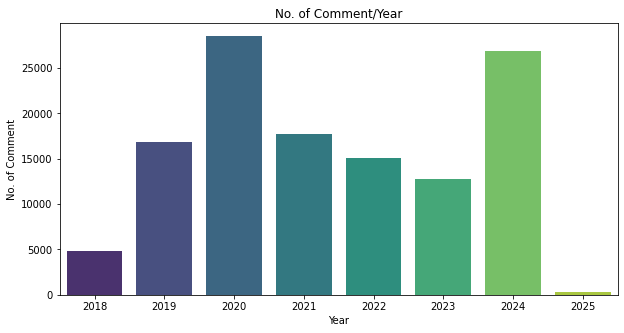

In [20]:
# data visulaization for the no. of content each year
plt.figure(figsize=(10,5))
sns.countplot(x=df['date'].dt.year, palette='viridis')
plt.title('No. of Comment/Year')
plt.xlabel('Year')
plt.ylabel('No. of Comment')
plt.show()


In [21]:
# remove emojis from the comment column
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # Chinese characters
        u"\U00002702-\U000027B0" 
        u"\U000024C2-\U0001F251" 
        u"\U0001f926-\U0001f937" 
        u"\U00010000-\U0010ffff" 
        u"\u2640-\u2642" 
        u"\u2600-\u2B55" 
        u"\u200d" 
        u"\u23cf" 
        u"\u23e9" 
        u"\u231a" 
        u"\ufe0f"  # dingbats
        u"\u3030" 
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['cleaned_text'] = df['comment'].apply(remove_emoji)

In [22]:
# remove emoticons from the comment column
emoticon_pattern = re.compile(r"""
    [:;= B]               # Eyes
    [\-']?              # Optional nose
    [\)\(DP\/\\\[\]\$\*O!]  # Mouth
""", re.VERBOSE)
df['cleaned_text'] = df.cleaned_text.apply(lambda x: emoticon_pattern.sub(r'', x))

In [23]:
# remove blank records from the comments column
def is_blank(string):
    return not string.strip()

df = df[~df['cleaned_text'].apply(is_blank)]
df

,reviewId,comment,score,date,cleaned_text
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55,fornikite with no colombus wind daphnee
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,"Yes I, m",5,2025-01-03 15:16:05,"Yes I, m"
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01,Adds popping up during movies
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25,App will not open on Amazon Fire Tablet. I can...
5,dfe9f50c-5a61-4a40-a32a-8a3e5729f660,I haven't been able to use Netflix on my Googl...,1,2025-01-03 14:54:07,I haven't been able to use Netflix on my Googl...
...,...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it! there are so many movies and...,5,2019-08-03 15:06:03,i really like it! there are so many movies and...
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,I love Netflix. I always enjoy my time using it.,5,2022-08-15 16:16:30,I love Netflix. I always enjoy my time using it.
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Sound quality is very slow of movies,1,2020-08-17 07:26:58,Sound quality is very slow of movies
123858,32870f7f-c461-4256-b602-75244ca60248,Rate is very expensive.. bcos we see netflix s...,1,2019-07-21 09:41:42,Rate is very expensive.. bcos we see netflix s...


In [24]:
import re
import string

# remove punctuation and numbers from the comment column
def remove_punctuation_and_numbers(text):
    """
    Removes all punctuation and numbers from the given text.
    - Uses str.translate() for punctuation removal.
    - Uses regular expression to remove numbers.
    - Handles missing (None) values by returning an empty string.
    """
    if not isinstance(text, str):  # Ensure input is a string
        return ""

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)  # Remove all digits

    return text

df['cleaned_text'] = df['cleaned_text'].apply(remove_punctuation_and_numbers)

C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_13212/876525900.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['cleaned_text'].apply(remove_punctuation_and_numbers)


In [25]:
# remove blank records from the comments column
df=df[~df['cleaned_text'].apply(is_blank)]
df

,reviewId,comment,score,date,cleaned_text
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55,fornikite with no colombus wind daphnee
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,"Yes I, m",5,2025-01-03 15:16:05,Yes I m
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01,Adds popping up during movies
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25,App will not open on Amazon Fire Tablet I can ...
5,dfe9f50c-5a61-4a40-a32a-8a3e5729f660,I haven't been able to use Netflix on my Googl...,1,2025-01-03 14:54:07,I havent been able to use Netflix on my Google...
...,...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it! there are so many movies and...,5,2019-08-03 15:06:03,i really like it there are so many movies and ...
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,I love Netflix. I always enjoy my time using it.,5,2022-08-15 16:16:30,I love Netflix I always enjoy my time using it
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Sound quality is very slow of movies,1,2020-08-17 07:26:58,Sound quality is very slow of movies
123858,32870f7f-c461-4256-b602-75244ca60248,Rate is very expensive.. bcos we see netflix s...,1,2019-07-21 09:41:42,Rate is very expensive bcos we see netflix sun...


# Translating Text

In [26]:
# Initialize translator
from langdetect import detect
from googletrans import Translator 

translator = Translator()

def preprocess_text(text):
    try:
        lang = detect(text)
        if lang != "en":  # Translate non-English text
            text = translator.translate(text, dest="en").text
        text = text.lower().strip()  # Normalize text
        return text
    except:
        return None  # Skip problematic reviews

# Apply preprocessing
df['cleaned_text'] = df['cleaned_text'].astype(str).apply(preprocess_text)
df.dropna(subset=['cleaned_text'], inplace=True)  # Remove empty comments

print(df.head())

C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_13212/618181284.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['cleaned_text'].astype(str).apply(preprocess_text)
C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_13212/618181284.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['cleaned_text'], inplace=True)  # Remove empty comments


                               reviewId  \
0  f1e2a08a-5c36-427f-9574-2d2c2f2d4a72   
1  5fef2461-0da9-47fc-8f61-6fe6ac426589   
2  8255ef9d-52ab-4981-ad59-ff869650f60e   
3  6e26402d-b74f-41df-b9a4-7a92a6a76271   
5  dfe9f50c-5a61-4a40-a32a-8a3e5729f660   

                                             comment  score  \
0            fornikite with no colombus wind daphnee      5   
1                                           Yes I, m      5   
2                      Adds popping up during movies      1   
3  App will not open on Amazon Fire Tablet. I can...      1   
5  I haven't been able to use Netflix on my Googl...      1   

                 date                                       cleaned_text  
0 2025-01-03 15:21:55            fornikite with no colombus wind daphnee  
1 2025-01-03 15:16:05                                            yes i m  
2 2025-01-03 15:16:01                      adds popping up during movies  
3 2025-01-03 15:10:25  app will not open on amazon fire tablet

In [27]:
df.sample(5)


,reviewId,comment,score,date,cleaned_text
47194,5133bbb2-03e0-4776-8821-02b2b8f8f02a,I accidentally bought a membership for a year ...,1,2019-11-01 13:15:14,i accidentally bought a membership for a year ...
111220,d1c44582-8f4c-4820-9493-fbfd2b070848,Thus is a very nice app. You can watch alot of...,5,2022-03-14 22:00:46,thus is a very nice app you can watch alot of ...
54424,fe1cfafb-1eb8-4c4f-97f8-7a302ad163fc,Netflix rocks. Please update app with Android ...,5,2019-09-19 23:47:06,netflix rockslease update app with android it...
25652,524fd40a-612e-4eda-a16c-0de4a4540976,It's a great app in general. But just today an...,3,2019-03-10 09:31:42,its a great app in general but just today and ...
100326,eedfc34c-2cbf-4aba-ab29-255493b8a77d,My family loves netflix but when a series fini...,5,2020-02-02 23:35:29,my family loves netflix but when a series fini...


# Text cleaning

In [28]:
import re
import string
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove extra spaces
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Example usage

df['cleaned_text'] = df['cleaned_text'].apply(clean_text)
df


[nltk_data] Downloading package stopwords to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_13212/4261875528.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['cleaned_text'].apply(clean_text)


,reviewId,comment,score,date,cleaned_text
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55,fornikite colombus wind daphnee
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,"Yes I, m",5,2025-01-03 15:16:05,yes
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01,add popping movie
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25,app open amazon fire tablet click profile app ...
5,dfe9f50c-5a61-4a40-a32a-8a3e5729f660,I haven't been able to use Netflix on my Googl...,1,2025-01-03 14:54:07,havent able use netflix google pixel pro since...
...,...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it! there are so many movies and...,5,2019-08-03 15:06:03,really like many movie kdramas watch
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,I love Netflix. I always enjoy my time using it.,5,2022-08-15 16:16:30,love netflix always enjoy time using
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Sound quality is very slow of movies,1,2020-08-17 07:26:58,sound quality slow movie
123858,32870f7f-c461-4256-b602-75244ca60248,Rate is very expensive.. bcos we see netflix s...,1,2019-07-21 09:41:42,rate expensive bcos see netflix sunday charged...


In [31]:
df.to_csv('results/translated_clean_text.csv',index=False)   

# EDA 

## Word Cloud

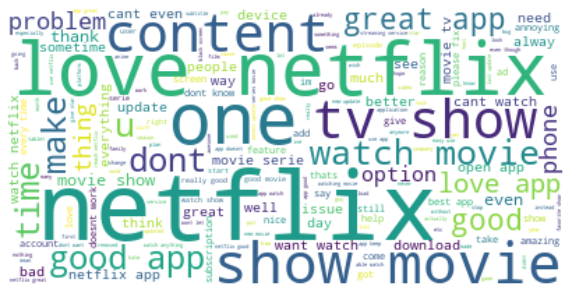

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color ='white').generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

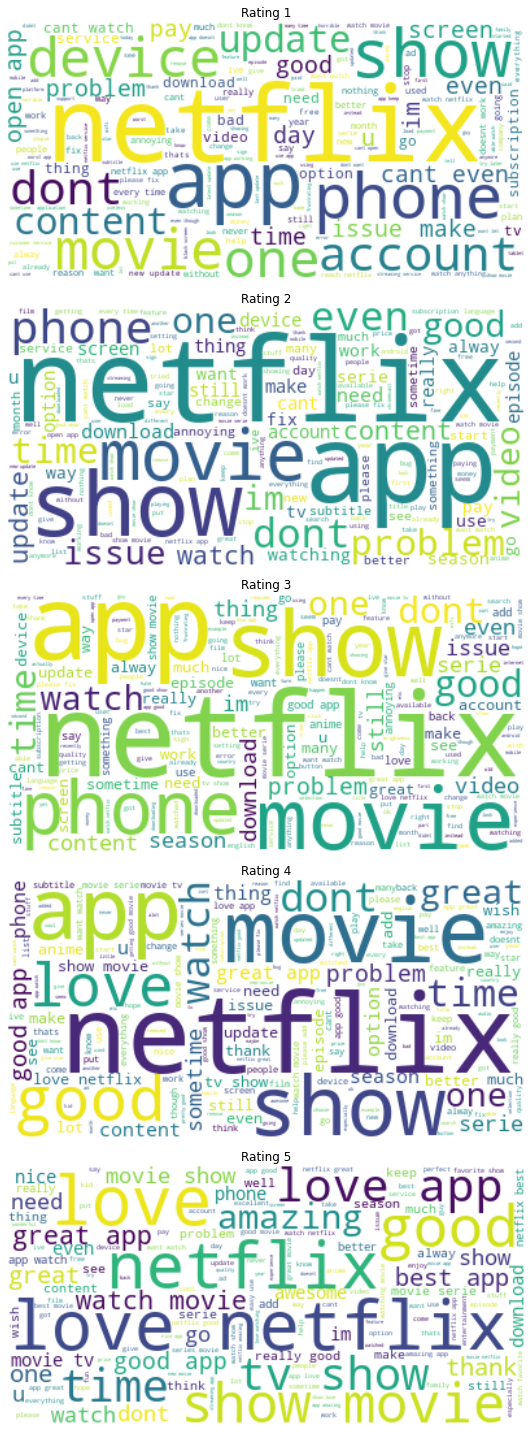

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set up the figure size
fig, axes = plt.subplots(5, 1, figsize=(20, 20))

# Generate and plot word clouds for each rating from 1 to 5
for i, score in enumerate(range(1, 6)):
    text = ' '.join(df[df['score'] == score]['cleaned_text'])
    
    if text.strip():  # Ensure there is text to generate a word cloud
        wordcloud = WordCloud(background_color='white').generate(text)
        
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f'Rating {score}')
    else:
        axes[i].axis('off')
        axes[i].set_title(f'Rating {score} (No Data)')

plt.tight_layout()
plt.show()
